# Loading the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [60]:
num_reviews = 2000

business = pd.read_pickle("data/" + str(num_reviews)+"_business.pkl")
user = pd.read_pickle("data/" + str(num_reviews)+"_user.pkl")
review = pd.read_pickle("data/" + str(num_reviews)+"_review.pkl")
checkin = pd.read_pickle("data/" + str(num_reviews)+"_checkin.pkl")
photo = pd.read_pickle("data/" + str(num_reviews)+"_photo.pkl")

print("Number of businesses:", business.shape[0])
print("Number of users:     ", user.shape[0])
print("Number of reviews:   ", review.shape[0])
print("Number of check-ins: ", checkin.shape[0])
print("Number of photos:    ", photo.shape[0])

Number of businesses: 1470
Number of users:      1960
Number of reviews:    2000
Number of check-ins:  1403
Number of photos:     7301


## Processing the data

In [26]:
business.categories = business.categories.apply(lambda x: x.split(", "))

In [27]:
user.elite = user.elite.apply(lambda x: x.split(","))
user.friends = user.friends.apply(lambda x: x.split(","))

In [28]:
def remove_empty(x):
    if "" in x:
        x.remove("")
    return x

user.elite = user.elite.apply(remove_empty)
user.friends = user.friends.apply(remove_empty)

In [29]:
user['num_elite_years'] = user.elite.apply(lambda x: len(x))
user['num_friends'] = user.friends.apply(lambda x: len(x))
user.yelping_since = pd.to_datetime(user.yelping_since)

# Viewing some statistics

## Reviews

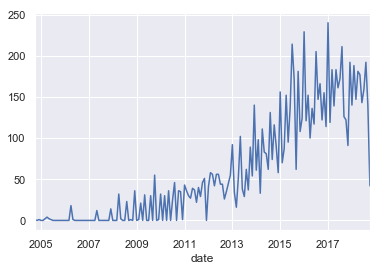

In [30]:
review.resample('M', on='date').size().plot()

## Businesses

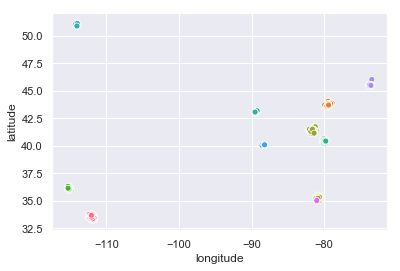

In [31]:
sns.scatterplot(x = business.longitude, y = business.latitude, hue=business.state, legend=False)

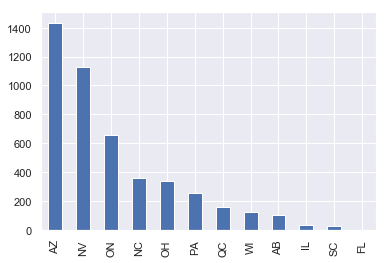

In [32]:
business.state.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Distribution of businesses in Arizona')

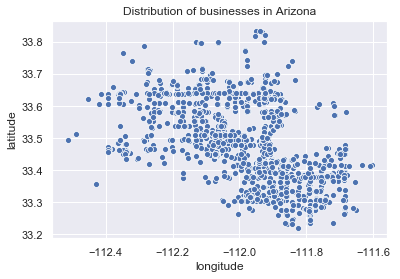

In [33]:
sns.scatterplot(x = business[business.state == 'AZ'].longitude, y = business[business.state == 'AZ'].latitude)
plt.title("Distribution of businesses in Arizona")

## Users

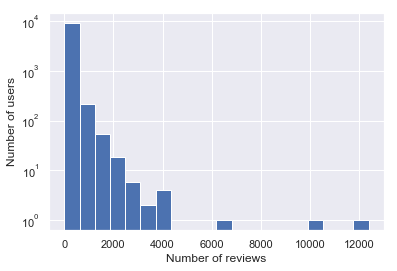

In [34]:
user.review_count.hist(bins=20)
plt.yscale("log")
plt.xlabel("Number of reviews")
_ = plt.ylabel("Number of users")

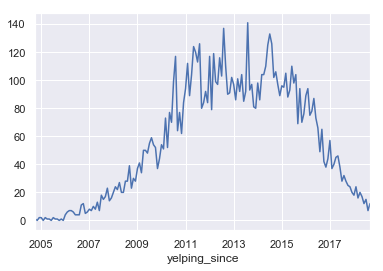

In [44]:
user.resample('M', on='yelping_since').size().plot()

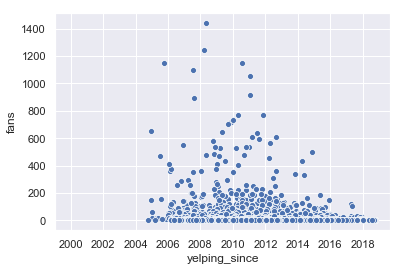

In [51]:
sns.scatterplot(x = user.yelping_since, y = user.fans)

In [47]:
user.head()

,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_elite_years,num_friends
user_id,,,,,,,,,,,,,,,,,,,,,
AsYMm_O4H-mwmWbmeACDHw,Christopher,318,2015-01-17 17:04:09,400,175,223,"[2016, 2017, 2018]","[4I_AqfW1E_OLDskrgxxU0Q, 0hm1__RgRWYvHXxWfUJM...",24,3.64,...,0,0,2,4,4,4,2,5,3,592
i3dgAM1hWY9UdUCNMDnLXQ,Victoria,95,2014-07-08 21:01:02,114,44,87,[],"[pxzs-Dy2hXTis-PuNCV37Q, uZCy7wuptQo3arWvhpqZ...",3,4.32,...,0,0,1,5,3,3,1,1,0,80
A7wZ9ajdlhbMeGIGAlUIbQ,Kameran,31,2015-03-03 13:59:05,53,11,25,[],"[VFuifZkPUFcuj2bT6rJ0JA, TDuiAfDn6gU7aX3tyqN8...",2,3.81,...,0,0,1,5,0,0,0,1,0,82
B2CkkEX341HLK3zbn3qcgQ,Carlos,4,2014-06-22 06:54:32,4,1,0,[],"[k7QixRwahZavaQ_Rhd9s_w, _gLR-74C8aY-lIP_u3vF...",0,3.00,...,0,0,0,0,0,0,0,0,0,118
xZAmw5gihOVO4duMN2Ju6Q,Flynn,70,2013-03-25 20:22:45,127,44,28,[],"[hRbdn-DZAuqYv88bezKrZQ, q3IYh428CVOkU_W90sM3...",0,3.21,...,0,0,2,6,0,0,0,0,0,96


# LDA

In [ ]:
import gensim
from gensim.models import CoherenceModel
import spacy
from tqdm import tqdm_notebook

tqdm_notebook().pandas()
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

import random

In [57]:
skip = {'$', 'CD', "POS"}
def tokenise(text):
    if type(text) != str:
        return []
    text = text.replace('.', '. ').replace('  ', ' ')
    doc = nlp(text, disable=["parser", "ner", "textcat"])
    tokens = [token.lemma_ for token in doc if (not token.is_stop and not token.is_punct and token.tag_ not in skip and len(token) > 2)]
    return tokens

In [61]:
review['tokens'] = review.text.progress_apply(tokenise)

In [62]:
dictionary = gensim.corpora.Dictionary(review['tokens'])
dictionary.filter_extremes(no_below=0.05, no_above=0.5)
len(dictionary)

In [65]:
corpus = [dictionary.doc2bow(doc) for doc in review['tokens']]

In [74]:
import progressbar
import math

In [ ]:
done = set()

In [134]:
done = {(2, 4),
 (2, 6),
 (2, 10),
 (2, 12),
 (2, 16),
 (2, 20),
 (2, 24),
 (6, 4),
 (6, 6),
 (6, 8),
 (6, 10),
 (6, 12),
 (6, 16),
 (6, 20),
 (12, 4),
 (12, 16),
 (16, 4),
 (16, 8),
 (16, 10),
 (16, 16),
 (16, 20),
 (16, 24),
 (20, 4),
 (20, 6),
 (20, 20),
 (24, 6),
 (24, 8),
 (24, 10),
 (24, 12),
 (24, 16),
 (24, 20),
 (24, 24),
 (28, 4),
 (28, 6),
 (28, 10),
 (28, 12),
 (28, 16),
 (28, 20),
 (28, 24)}

In [130]:
list_passes = [2, 6, 8, 12, 16, 20, 24, 28]
list_num_topics = [3, 4, 5, 6, 8, 10, 12, 16, 20, 24]
random_states = [1,2,3,4,5]

best_passes = 8
best_num_topics = 4
max_coherence = 0.3779175190706818

In [131]:
def calc_coherence(model):
    coherence_model_lda = CoherenceModel(model=model, texts=review['tokens'], dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [133]:
maxVal = math.floor(len(list_passes) * len(list_num_topics) * 0.7)
bar = progressbar.ProgressBar(max_value=maxVal)
while len(done) < maxVal:
    passes = random.choice(list_passes)
    num_topics = random.choice(list_num_topics)
    tup = (passes, num_topics)
    if tup in done:
        continue
    
    sum_coherence = 0
    for random_state in random_states:
        lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                            id2word=dictionary,
                                                            num_topics=num_topics, 
                                                            random_state=random_state,
                                                            chunksize=200,
                                                            passes=passes,
                                                            workers=4,
                                                            per_word_topics=True)

        sum_coherence += calc_coherence(lda_model)
    
    sum_coherence /= len(random_states)
    done.add(tup)
    bar.update(len(done))
    
    if sum_coherence > max_coherence:
        max_coherence = sum_coherence
        print("Passes:", passes, ", no. of topics:", num_topics)
        print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
        print('Coherence Score: ', sum_coherence)
        print("")

 76% (43 of 56) |##################      | Elapsed Time: 0:02:58 ETA:   0:13:13

Passes: 8 , no. of topics: 4
Perplexity:  -7.7421270011200845
Coherence Score:  0.3779175190706818



100% (56 of 56) |########################| Elapsed Time: 0:20:38 ETA:  00:00:00

In [113]:
mallet_path = os.path.join(os.getcwd(), 'models', 'mallet-2.0.8')

import os
os.environ.update({'MALLET_HOME':mallet_path})

In [120]:
for num_topics in list_num_topics:
    ldamallet = gensim.models.wrappers.LdaMallet(os.path.join(mallet_path, 'bin', 'mallet'), corpus=corpus, num_topics=num_topics, id2word=dictionary)
    coherence = calc_coherence(ldamallet)
    print(num_topics, ":", coherence)

4 : 0.43320111896358016
8 : 0.3895277926774182
12 : 0.4023984878343095
16 : 0.39564001603904586
20 : 0.385973342621366


KeyboardInterrupt: 

In [84]:
# model = gensim.models.KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin', binary=True)
# model[review['tokens'][0]]